<a href="https://colab.research.google.com/github/hyulianton/BigData/blob/main/Preprocessing_Teks_dengan_20_Newsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

- **fetch_20newsgroups**: Dataset dari scikit-learn yang berisi 18.000+ dokumen teks dari 20 kategori newsgroup (misal: `sci.space`, `rec.sport.baseball`).
- **TfidfVectorizer**: Alat untuk mengubah teks menjadi vektor numerik menggunakan TF-IDF (*Term Frequency-Inverse Document Frequency*).

In [2]:
newsgroups = fetch_20newsgroups(subset='train')
corpus = newsgroups.data[:500]  # Ambil 500 dokumen pertama

- **Dataset 20 Newsgroups**:  
  - **Subset 'train'**: Data latih dengan 11.314 dokumen.  
  - **Struktur Setiap Dokumen**: Teks mentah dengan header, body, dan footer.  
  - **Contoh Konten**:  
    ```
    From: user@domain.com
    Subject: Re: Space Shuttle Launch
    NASA announced the next shuttle launch...
    ```
- **`corpus = newsgroups.data[:500]`**:  
  - Mengambil 500 dokumen pertama untuk mempercepat proses demo.  


In [3]:
vectorizer = TfidfVectorizer(
    max_features=1000,      # Batasi jumlah fitur
    stop_words='english',   # Hapus stopwords (the, is, and, dll)
    ngram_range=(1, 2)      # Ambil unigram dan bigram
)
X_tfidf = vectorizer.fit_transform(corpus)

#### **A. Parameter `max_features=1000`**  
- **Tujuan**: Membatasi jumlah kata/fitur yang dihasilkan menjadi 1000 term terpenting.  
- **Alasan**:  
  - Mencegah dimensi terlalu besar (dari 500 dokumen bisa menghasilkan >10.000 fitur).  
  - Mempercepat komputasi dan mengurangi *noise* dari kata jarang muncul.  

#### **B. Parameter `stop_words='english'`**  
- **Tujuan**: Menghapus kata umum yang tidak informatif (*stopwords*) seperti "the", "and", "is".  
- **Daftar Stopwords**:  

In [4]:
print(vectorizer.get_stop_words())  # Output: {'the', 'and', 'to', ...}

frozenset({'take', 'to', 'this', 'against', 'part', 'within', 'nothing', 'via', 'through', 'forty', 'nor', 'what', 'am', 'only', 'hence', 'becomes', 'besides', 'whither', 'therefore', 'could', 'beforehand', 'afterwards', 'now', 'cannot', 'often', 'found', 'go', 'nobody', 'more', 'indeed', 'his', 'latter', 'an', 'done', 'these', 'about', 'down', 'must', 'least', 'might', 'for', 'eleven', 'when', 'per', 'most', 'whereas', 'top', 'inc', 'call', 'eight', 'however', 'itself', 'their', 'already', 'across', 'before', 'until', 'behind', 'he', 'show', 'formerly', 'along', 'themselves', 'without', 'do', 'first', 'became', 'as', 'keep', 'somewhere', 'have', 'serious', 're', 'another', 'or', 'we', 'her', 'hers', 'sometimes', 'had', 'less', 'seem', 'then', 'rather', 'see', 'my', 'thereafter', 'interest', 'wherever', 'your', 'our', 'there', 'whether', 'a', 'whenever', 'twenty', 'may', 'anyway', 'also', 'cant', 'somehow', 'under', 'very', 'hundred', 'two', 'elsewhere', 'detail', 'been', 'become', 'be

- **Efek**: Meningkatkan kualitas fitur dengan fokus pada kata kunci.  

#### **C. Parameter `ngram_range=(1, 2)`**  
- **Tujuan**: Menangkap kata tunggal (*unigram*) dan pasangan kata (*bigram*).  
- **Contoh**:  
  - Teks: "machine learning"  
  - Unigram: ["machine", "learning"]  
  - Bigram: ["machine learning"]  
- **Manfaat**: Mempertahankan konteks frasa penting (misal: "space shuttle", "black hole").  

#### **D. Proses TF-IDF**  
1. **Term Frequency (TF)**:  
   - Menghitung frekuensi kata dalam satu dokumen.  
   - Rumus: $ \text{TF}(t, d) = \frac{\text{Jumlah kemunculan term } t \text{ di dokumen } d}{\text{Jumlah total term di dokumen } d} $  

2. **Inverse Document Frequency (IDF)**:  
   - Mengukur pentingnya term di seluruh korpus.  
   - Rumus: $ \text{IDF}(t) = \log\left(\frac{\text{Jumlah dokumen}}{\text{Jumlah dokumen yang mengandung term } t + 1}\right) $  

3. **TF-IDF**:  
   - $ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) $  
   - **Hasil**: Matriks sparse di mana setiap baris adalah dokumen, dan setiap kolom adalah skor TF-IDF untuk suatu term.  

---

In [5]:
print("Contoh fitur:", vectorizer.get_feature_names_out()[100:110])
print("Dimensi matrix:", X_tfidf.shape)

Contoh fitur: ['according' 'action' 'actually' 'ad' 'adam' 'add' 'address' 'advance'
 'age' 'ago']
Dimensi matrix: (500, 1000)


  - Fitur adalah kata/bigram yang terpilih.  
  - Indeks 100-110 menunjukkan contoh term di tengah kosakata.  

#### **B. Dimensi Matrix**  
- **Output**: `(500, 1000)`  
  - **500**: Jumlah dokumen.  
  - **1000**: Jumlah fitur (kata/bigram) yang dipilih.  

---

### **Visualisasi Alur Preprocessing**

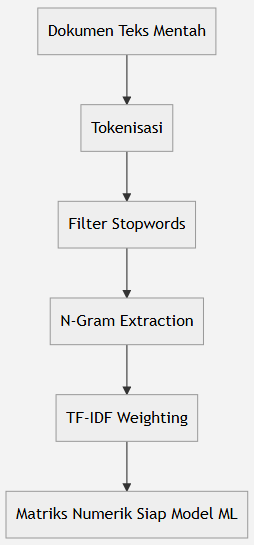

### **Mengapa Teknik Ini Penting?**
1. **Representasi Numerik**:  
   - Model ML (SVM, Naive Bayes, dll) tidak bisa memproses teks langsung.  
2. **Penekanan pada Kata Kunci**:  
   - TF-IDF memberi bobot tinggi pada kata yang spesifik ke dokumen tertentu (misal: "NASA" di dokumen tentang antariksa).  
3. **Reduksi Dimensi**:  
   - `max_features=1000` mencegah *curse of dimensionality*.  

---

### **Kapan Menggunakan Parameter Ini?**
- **`max_features`**:  
  - Saat dataset sangat besar atau sumber daya komputasi terbatas.  
- **`ngram_range=(1,2)`**:  
  - Untuk tugas yang membutuhkan pemahaman konteks frasa (misal: analisis sentimen).  
- **`stop_words='english'`**:  
  - Hampir selalu digunakan kecuali untuk kasus khusus (misal: analisis gaya penulisan).  

---

### **Contoh Aplikasi**  
1. **Klasifikasi Topik**:  
   - Mengkategorikan dokumen ke 20 newsgroup berdasarkan konten.  
2. **Pencarian Dokumen**:  
   - Mencari dokumen mirip menggunakan *cosine similarity* pada vektor TF-IDF.  
3. **Clustering**:  
   - Mengelompokkan dokumen dengan topik serupa menggunakan K-Means.  

---

### **Catatan Penting**
1. **Pembersihan Teks Tambahan**:  
   - Contoh program tidak mencakup:  
     - **Stemming/Lemmatization** (misal: "running" → "run").  
     - **Hapus Tanda Baca/Header** (misal: "From: user@domain.com").  
   - Untuk hasil lebih baik, lakukan pra-pemrosesan tambahan sebelum TF-IDF.  
2. **Optimasi Parameter**:  
   - Eksperimen dengan `max_features` (500-10.000) dan `ngram_range` (1,1 atau 1,3).  
3. **Alternatif**:  
   - **Word Embeddings** (Word2Vec, BERT) untuk representasi lebih kaya.  

Dengan preprocessing ini, teks mentah yang berantakan berubah menjadi struktur numerik siap untuk analisis machine learning! 📰🔢